<p style="text-align:right"><img  src="https://postmba.org/www/wp-content/uploads/2021/10/PostMBA-logo.png" width="150" alt="regression"></p>


<p style="text-align:center"><img  src="utils/images/markov_chain.png" width="600" alt="regression"></p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;align:left">
<font face="Arial" size=2><b>
Created by :
Hosein Ahmadi</b>
</font>
</p>


A **Markov process** is a stochastic process that satisfies the Markov property (sometimes characterized as <ins>"memorylessness")</ins>.  
In simpler terms, it is a process for which predictions can be made regarding future outcomes based solely on its present state and—most importantly—such predictions are just as good as the ones that could be made knowing the process's full history.[13] In other words, conditional on the present state of the system, its future and past states are independent.

In [10]:
from utils.data_gatherer import *
import matplotlib.pyplot as plt
import numpy as np
import unicodedata

import pydtmc
plt.ion()

import warnings
warnings.filterwarnings('ignore')

### Markov chain viz

In [11]:
transition_matrix = np.array([[0.5, 0.3, 0.2],
                              [0.1, 0.6, 0.3],
                              [0.05, 0.3, 0.65]]) #defining of transtion matrix in 
states_list = ['S', #sunny
               'R', #Runny
               'C' #cloudy
               ]

markov_chain = pydtmc.MarkovChain(transition_matrix, states_list)

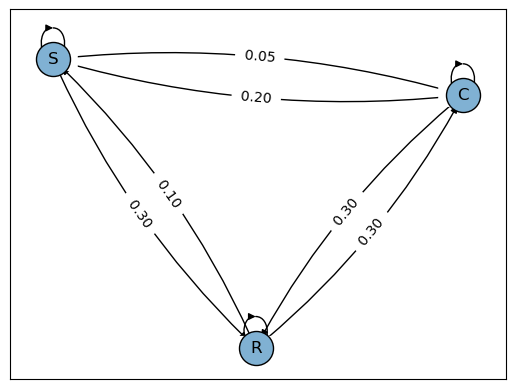

In [12]:
pydtmc.plot_graph(markov_chain)
plt.show()

### Markov Chain on Stock market

In [2]:
def contains_arabic_or_persian(text):
    for char in text:
        if 'ARABIC' in unicodedata.name(char, ''):
            return True
    return False

In [11]:
class Markov_chain():
    def __init__(self, symbol):
        self.symbol = symbol
    
    def get_transient_matrix(self):
        states_list = ['Bear', 'Bull', 'Cons']
        is_persian_symbol = contains_arabic_or_persian(self.symbol)
        
        if is_persian_symbol:
            price_data = get_daily_price_data(symbol= self.symbol,
                                              start_date='1400-01-01',
                                              end_date='1403-09-01')
            price_data = (price_data.set_index('jdate')[['Adj Close']]
                          .rename(columns={'Adj Close': 'Close'}))
            
        else:
            price_data = yf.Ticker(self.symbol).history(period="3y")[['Close']]
            
        price_data['Daily_change'] = price_data['Close'].pct_change()
        price_data.dropna(inplace=True)
        thresh_dict = {'Up': 0.001, 'Down': -0.001}
        print(price_data)
        price_data['state'] = np.where(price_data['Daily_change'] > thresh_dict['Up'], 'Up', 'Flat')
        price_data['state'] = np.where(price_data['Daily_change'] < thresh_dict['Down'], 'Down', price_data['state'])
        price_data['prior_state'] = price_data['state'].shift(1)
        states = price_data[['state', 'prior_state']].dropna()
        states_mat = states.groupby(['state', 'prior_state']).size().unstack()
        transition_matrix = states_mat.div(states_mat.sum(axis=1), axis=0)
        self.transition_matrix = transition_matrix
        self.markov_chain = pydtmc.MarkovChain(transition_matrix, states_list)
        
        return transition_matrix
    
    def print_markov_properties(self):
        print('Model absorbing states')
        print(self.markov_chain.absorbing_states)
        print('Model is ergodic?')
        print(self.markov_chain.is_ergodic)
        print('Model Recurrent states')
        print(self.markov_chain.recurrent_states)
        print('Model Transient states')
        print(self.markov_chain.transient_states)
        print('Model steady states')
        print(self.markov_chain.steady_states)
        
    def plot_markov_chain(self):
        pydtmc.plot_graph(self.markov_chain, dpi=75)
        pydtmc.plot_eigenvalues(self.markov_chain, dpi=75)
        pydtmc.plot_sequence(self.markov_chain, 10, dpi=75, plot_type='histogram')
        pydtmc.plot_sequence(self.markov_chain, 10, dpi=75, plot_type='heatmap')
        pydtmc.plot_sequence(self.markov_chain, 10, dpi=75, plot_type='matrix')
        pydtmc.plot_redistributions(self.markov_chain, 10, dpi=75, plot_type='heatmap')
        pydtmc.plot_redistributions(self.markov_chain, 10, dpi=75, plot_type='projection')

### Persian Symbols

            Close  Daily_change
jdate                          
1400-01-08   1546     -0.025835
1400-01-10   1597      0.032988
1400-01-11   1581     -0.010019
1400-01-14   1563     -0.011385
1400-01-15   1532     -0.019834
...           ...           ...
1403-02-22   2838     -0.017653
1403-02-23   2814     -0.008457
1403-02-24   2768     -0.016347
1403-02-25   2765     -0.001084
1403-02-26   2784      0.006872

[753 rows x 2 columns]
Model absorbing states
[]
Model is ergodic?
True
Model Recurrent states
['Bear', 'Bull', 'Cons']
Model Transient states
[]
Model steady states
[array([0.46953247, 0.09843647, 0.43203105])]


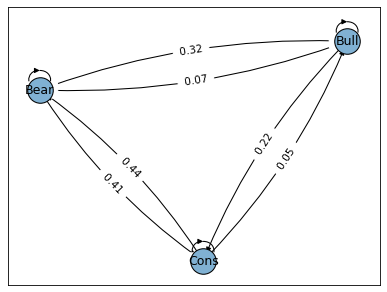

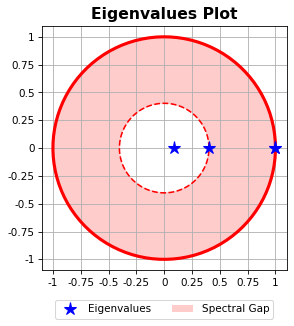

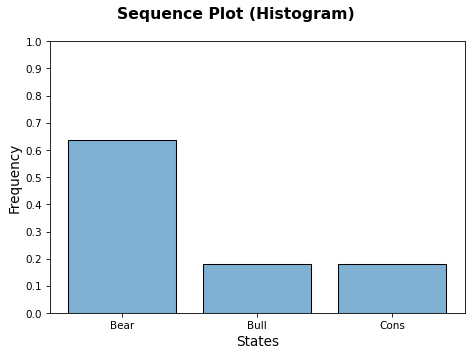

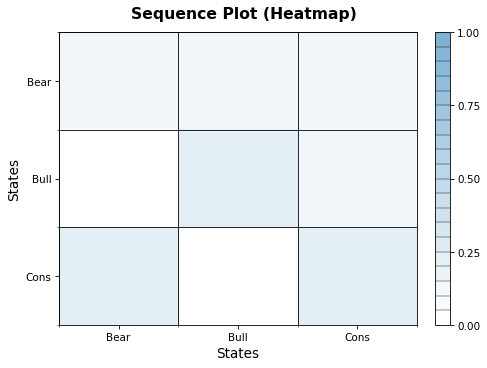

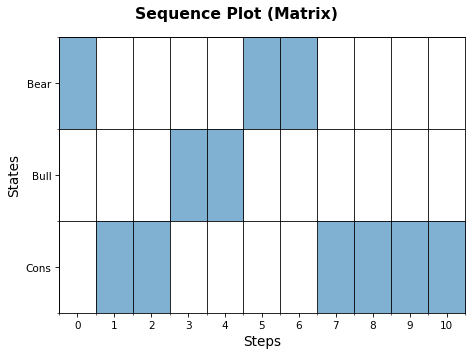

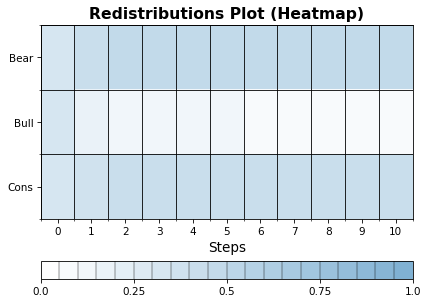

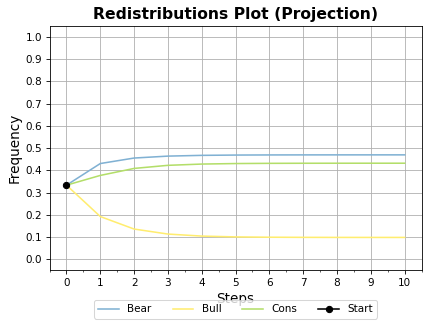

In [12]:
mv = Markov_chain(symbol='شتران')
mv.get_transient_matrix()
mv.print_markov_properties()
mv.plot_markov_chain()

            Close  Daily_change
jdate                          
1400-09-30  10000      0.000000
1400-10-01  10000      0.000000
1400-10-04  10000      0.000000
1400-10-05  10000      0.000000
1400-10-06  10000      0.000000
...           ...           ...
1403-02-22  21910     -0.015281
1403-02-23  21710     -0.009128
1403-02-24  21850      0.006449
1403-02-25  21360     -0.022426
1403-02-26  21810      0.021067

[576 rows x 2 columns]
Model absorbing states
[]
Model is ergodic?
True
Model Recurrent states
['Bear', 'Bull', 'Cons']
Model Transient states
[]
Model steady states
[array([0.49225234, 0.04223937, 0.4655083 ])]


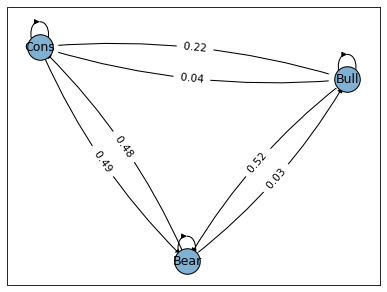

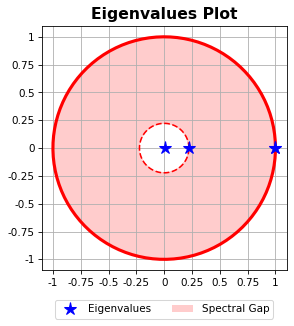

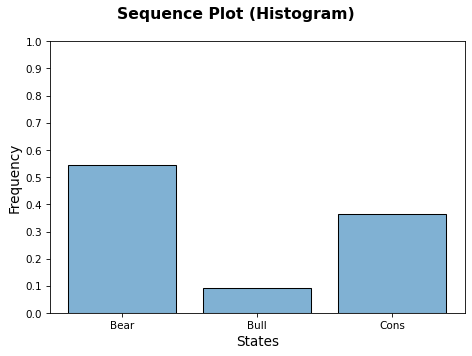

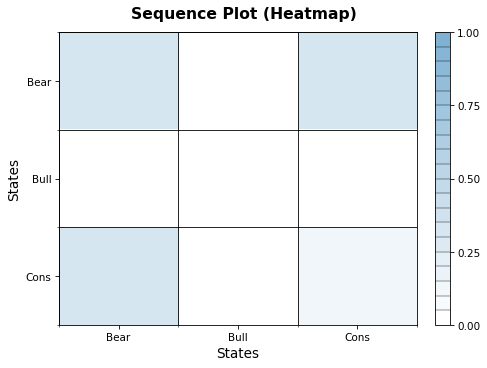

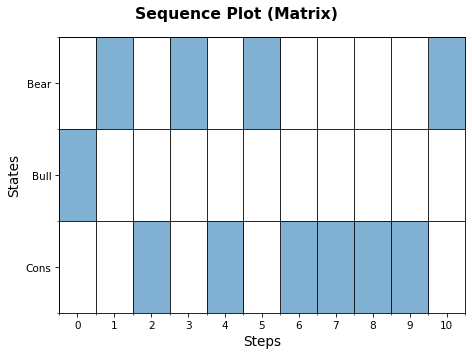

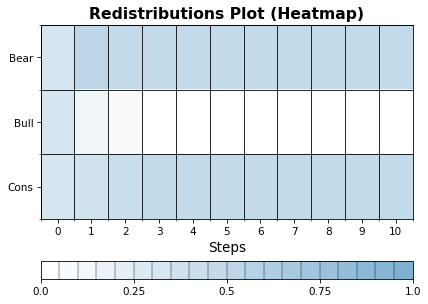

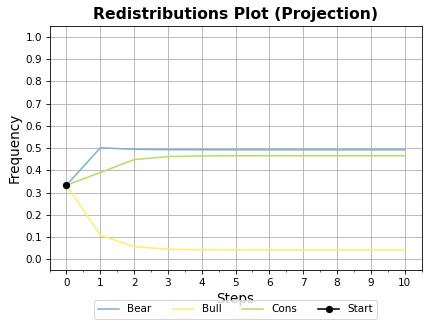

In [13]:
mv = Markov_chain(symbol='اهرم')
mv.get_transient_matrix()
mv.print_markov_properties()
mv.plot_markov_chain()

### Nasdaq Symbols

                               Close  Daily_change
Date                                              
2021-05-18 00:00:00-04:00  10.184407     -0.000823
2021-05-19 00:00:00-04:00  10.159239     -0.002471
2021-05-20 00:00:00-04:00  10.478025      0.031379
2021-05-21 00:00:00-04:00  11.182714      0.067254
2021-05-24 00:00:00-04:00  10.956207     -0.020255
...                              ...           ...
2024-05-10 00:00:00-04:00  11.990000     -0.011542
2024-05-13 00:00:00-04:00  12.330000      0.028357
2024-05-14 00:00:00-04:00  12.440000      0.008921
2024-05-15 00:00:00-04:00  12.310000     -0.010450
2024-05-16 00:00:00-04:00  12.315000      0.000406

[755 rows x 2 columns]
Model absorbing states
[]
Model is ergodic?
True
Model Recurrent states
['Bear', 'Bull', 'Cons']
Model Transient states
[]
Model steady states
[array([0.47612732, 0.04244032, 0.48143236])]


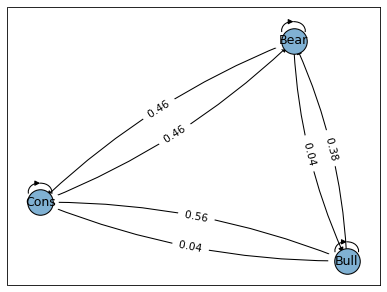

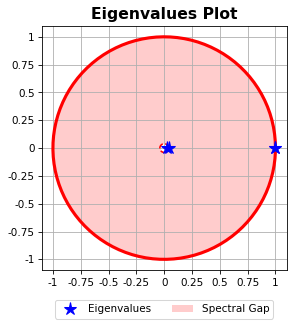

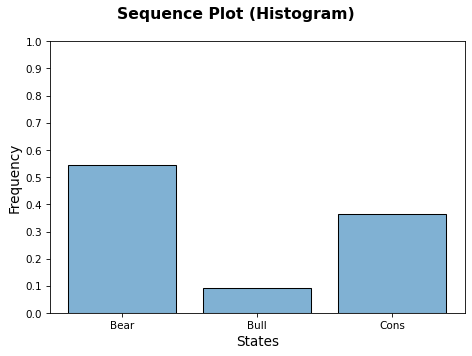

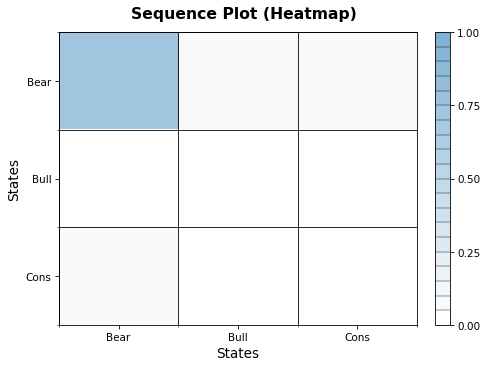

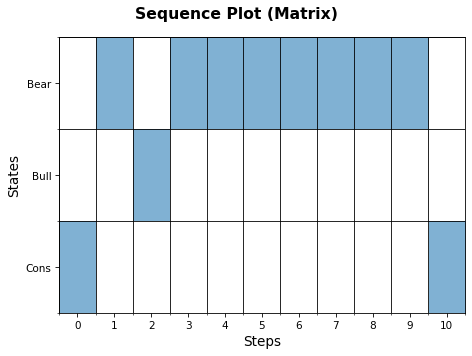

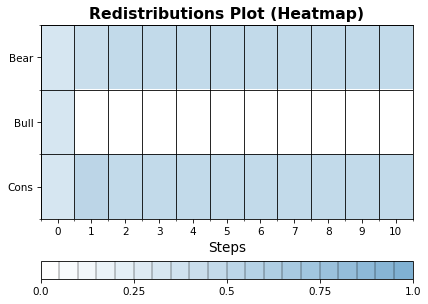

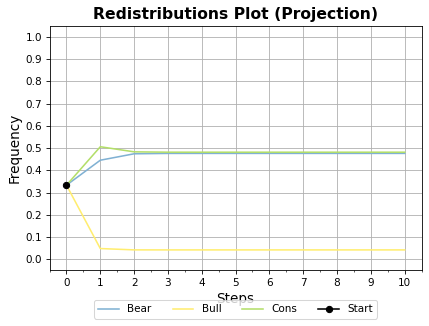

In [14]:
mv = Markov_chain(symbol='F')
mv.get_transient_matrix()
mv.print_markov_properties()
mv.plot_markov_chain()

                                Close  Daily_change
Date                                               
2021-05-18 00:00:00-04:00  122.751976     -0.011246
2021-05-19 00:00:00-04:00  122.594666     -0.001282
2021-05-20 00:00:00-04:00  125.170639      0.021012
2021-05-21 00:00:00-04:00  123.322235     -0.014767
2021-05-24 00:00:00-04:00  124.964165      0.013314
...                               ...           ...
2024-05-10 00:00:00-04:00  183.050003     -0.006890
2024-05-13 00:00:00-04:00  186.279999      0.017645
2024-05-14 00:00:00-04:00  187.429993      0.006173
2024-05-15 00:00:00-04:00  189.720001      0.012218
2024-05-16 00:00:00-04:00  190.559998      0.004428

[755 rows x 2 columns]
Model absorbing states
[]
Model is ergodic?
True
Model Recurrent states
['Bear', 'Bull', 'Cons']
Model Transient states
[]
Model steady states
[array([0.45493423, 0.0556905 , 0.48937528])]


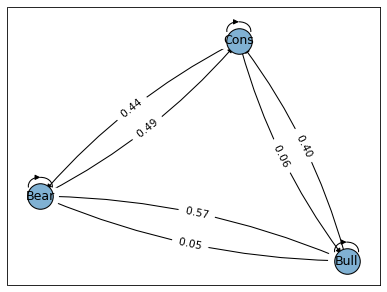

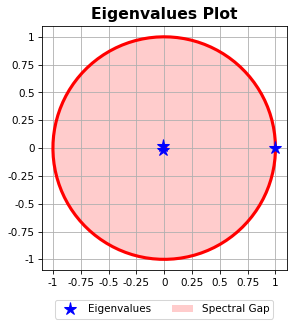

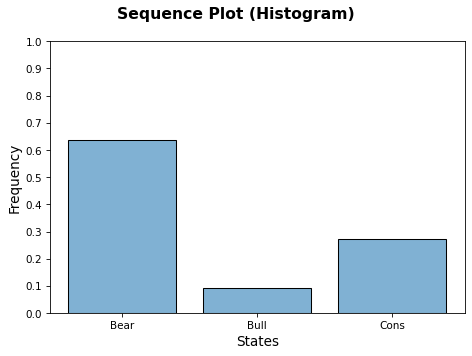

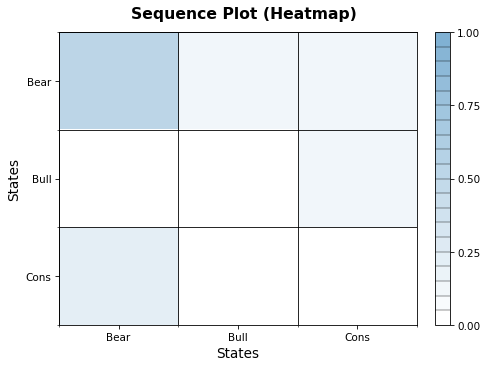

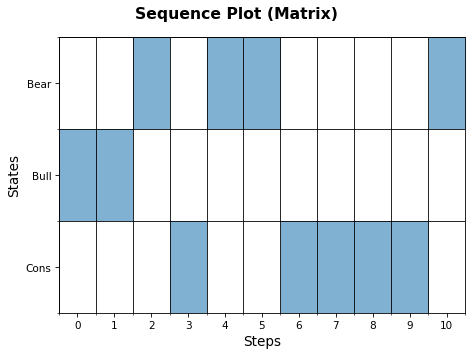

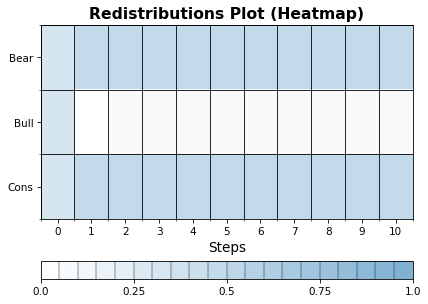

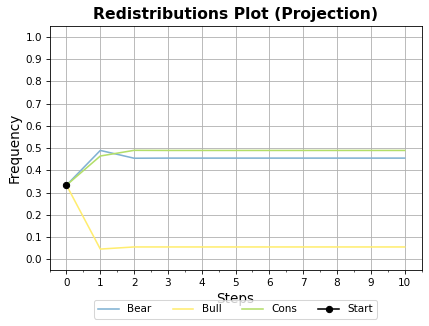

In [15]:
mv = Markov_chain(symbol='AAPL')
mv.get_transient_matrix()
mv.print_markov_properties()
mv.plot_markov_chain()